In [1]:
# globa library
from pandas import read_csv, DataFrame, to_datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

#3 links de ínteres

In [2]:
# Dataframe
df_datagen = read_csv('../DataGeneración_filo.csv')
df_semestre1 = df_datagen.loc[(df_datagen['Fecha'] >= '2021-01-01') & (df_datagen['Fecha'] < '2021-06-30')]


In [3]:
df_semestre1.index = to_datetime(df_semestre1['Fecha'])
del df_semestre1['Fecha']



In [4]:
print(df_semestre1.head())


                           kWh
Fecha                         
2021-01-01 00:00:00  353483.09
2021-01-01 01:00:00  387809.23
2021-01-01 02:00:00  385176.88
2021-01-01 03:00:00  372592.99
2021-01-01 04:00:00  368292.48


<Axes: xlabel='Fecha'>

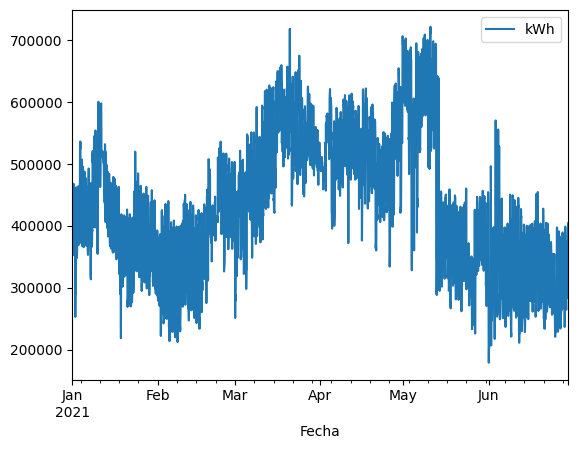

In [5]:
df_semestre1.plot()


In [6]:
df_semestre1_day = df_semestre1.resample("d").mean()


<Axes: xlabel='Fecha'>

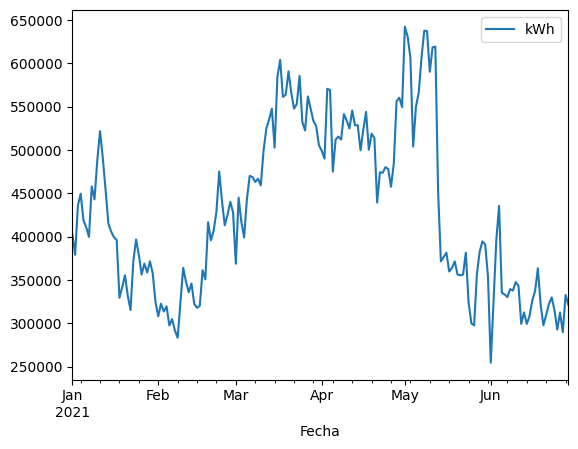

In [7]:
df_semestre1_day.plot()


# Stationarity

In [8]:
# semestre 1
rolling_mean_6t = df_semestre1_day.rolling(7).mean()
rolling_std_6t = df_semestre1_day.rolling(7).std()

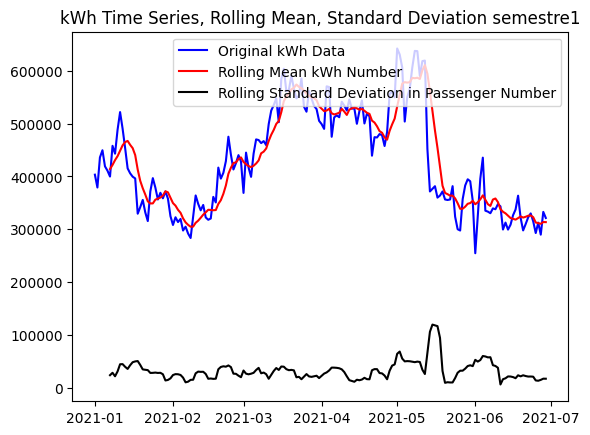

In [9]:
plt.plot(df_semestre1_day, color="blue",label="Original kWh Data")
plt.plot(rolling_mean_6t, color="red", label="Rolling Mean kWh Number")
plt.plot(rolling_std_6t, color="black", label = "Rolling Standard Deviation in Passenger Number")
plt.title("kWh Time Series, Rolling Mean, Standard Deviation semestre1")
plt.legend(loc="best")

In [11]:
adft_6 = adfuller(df_semestre1_day,autolag="AIC")


In [13]:
output_df_6 = DataFrame(
        {"Values":[
            adft_6[0],adft_6[1],adft_6[2],adft_6[3], adft_6[4]['1%'], adft_6[4]['5%'], adft_6[4]['10%']
            ], 
        "Metric":["Test Statistics","p-value","No. of lags used",
        "Number of observations used", 
        "critical value (1%)", "critical value (5%)", "critical value (10%)"]
        }
    )

In [14]:
display(output_df_6)


,Values,Metric
0,-1.723801,Test Statistics
1,0.418893,p-value
2,2.000000,No. of lags used
3,177.000000,Number of observations used
4,-3.467845,critical value (1%)
5,-2.878012,critical value (5%)
6,-2.575551,critical value (10%)


# Autocorrelation

In [15]:
autocorrelation_lag1_6 = df_semestre1_day['kWh'].autocorr(lag=1)
print("One Day Lag 6T: ", autocorrelation_lag1_6)


One Day Lag 6T:  0.9318463707309681


In [16]:
day=6
autocorrelation_lag9_6 = df_semestre1_day['kWh'].autocorr(lag=day)
print(f"{day} Day Lag 6T: ", autocorrelation_lag9_6)


6 Day Lag 6T:  0.7418600039120016


# Decomposition

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose